# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
##### GENERAL OBSERVATIONS #####
# The primary hypothesis of this analysis was that proximity to the equator yields differences in the weather. The results
# seem fairly conclusive with regard to an increase in temperature correlating to the approach to 0 degrees latitude. 
# The results show significantly less correlation between latitude and the other chosen weather measures.
# The analysis is limited by the scope of the measurements used, and would likely yield more significant findings if additional
# data points were used. Those could include using different points in time, precipitation amounts, elevation, and area climate
# that could all have equal importance to temperature, humidity, cloud cover, and wind speed variables as latitude does.

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
linregress
# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
# Save config information.
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

# Build partial query URL
query_url = f'{url}appid={weather_api_key}&units={units}&q='
# print(query_url)
# print(city_num)
# print(citynm)
# print(lat)
# print(lng)
# print(cityid)
# print(cloud)
# print(country)
# print(date)
# print(humid)
# print(mxtemp)
# print(windspd)

# initialize a city_num counter to show the number of loop iterations
city_num = 1
# set up lists to hold reponse info
citynm = []
lat = []
lng = []
cityid = []
cloud = []
country = []
date = []
humid = []
mxtemp = []
windspd = []

print('Beginning Data Retrieval')
print('------------------------------------------------')

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city)
    response_json = response.json()
    
    # Try to grab obtain necessary data from OpenWeather API for the cities generated
    try:
        citynm.append(response_json['name'])
        lng.append(response_json['coord']['lon'])
        lat.append(response_json['coord']['lat'])
        cityid.append(response_json['id'])
        cloud.append(response_json['clouds']['all'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        humid.append(response_json['main']['humidity'])
        mxtemp.append(response_json['main']['temp_max'])
        windspd.append(response_json['wind']['speed'])
        print(f'Processing Record {city_num} of cities list: {city}')
    # Handle exceptions for cities that are not found in the OpenWeather API
    except:
        # Append null values
        print('City not found. Skipping...')
        pass
    city_num = city_num + 1
    time.sleep(1.05)

Beginning Data Retrieval
------------------------------------------------
Processing Record 1 of cities list: jaru
Processing Record 2 of cities list: qaanaaq
Processing Record 3 of cities list: rikitea
Processing Record 4 of cities list: hamilton
Processing Record 5 of cities list: voh
Processing Record 6 of cities list: bengkulu
Processing Record 7 of cities list: cherskiy
Processing Record 8 of cities list: fortuna
Processing Record 9 of cities list: tasiilaq
Processing Record 10 of cities list: guerrero negro
Processing Record 11 of cities list: katherine
City not found. Skipping...
Processing Record 13 of cities list: cidreira
Processing Record 14 of cities list: iquique
Processing Record 15 of cities list: khatanga
Processing Record 16 of cities list: leh
Processing Record 17 of cities list: fergus falls
Processing Record 18 of cities list: jamestown
Processing Record 19 of cities list: oussouye
Processing Record 20 of cities list: kysyl-syr
Processing Record 21 of cities list: u

Processing Record 182 of cities list: coihaique
Processing Record 183 of cities list: pangody
Processing Record 184 of cities list: maumere
Processing Record 185 of cities list: nizhniy kuranakh
Processing Record 186 of cities list: kieta
Processing Record 187 of cities list: cap malheureux
Processing Record 188 of cities list: naze
City not found. Skipping...
Processing Record 190 of cities list: mildura
City not found. Skipping...
Processing Record 192 of cities list: sao filipe
Processing Record 193 of cities list: kharan
Processing Record 194 of cities list: ostrovnoy
Processing Record 195 of cities list: bambous virieux
Processing Record 196 of cities list: nemuro
Processing Record 197 of cities list: nizhniy odes
Processing Record 198 of cities list: lavrentiya
Processing Record 199 of cities list: orange
Processing Record 200 of cities list: lompoc
Processing Record 201 of cities list: tiznit
Processing Record 202 of cities list: ngunguru
Processing Record 203 of cities list: si

City not found. Skipping...
Processing Record 363 of cities list: zheleznogorsk-ilimskiy
Processing Record 364 of cities list: gigmoto
Processing Record 365 of cities list: hovd
Processing Record 366 of cities list: san patricio
Processing Record 367 of cities list: taganak
Processing Record 368 of cities list: moosomin
Processing Record 369 of cities list: port lincoln
City not found. Skipping...
Processing Record 371 of cities list: sattahip
Processing Record 372 of cities list: yermolayevo
Processing Record 373 of cities list: neiafu
Processing Record 374 of cities list: araouane
Processing Record 375 of cities list: surt
Processing Record 376 of cities list: beloha
Processing Record 377 of cities list: evensk
Processing Record 378 of cities list: biltine
City not found. Skipping...
Processing Record 380 of cities list: martapura
Processing Record 381 of cities list: cairns
Processing Record 382 of cities list: nome
City not found. Skipping...
Processing Record 384 of cities list: g

Processing Record 541 of cities list: ati
Processing Record 542 of cities list: shubarshi
Processing Record 543 of cities list: iwanai
Processing Record 544 of cities list: pandan
Processing Record 545 of cities list: manokwari
Processing Record 546 of cities list: port said
Processing Record 547 of cities list: batagay
Processing Record 548 of cities list: belyy yar
Processing Record 549 of cities list: aljezur
Processing Record 550 of cities list: concordia
Processing Record 551 of cities list: iquitos
Processing Record 552 of cities list: la ronge
Processing Record 553 of cities list: oktyabrskoye
Processing Record 554 of cities list: utiel
Processing Record 555 of cities list: meridian
Processing Record 556 of cities list: jiran
Processing Record 557 of cities list: fare
City not found. Skipping...
Processing Record 559 of cities list: porbandar
Processing Record 560 of cities list: aban
Processing Record 561 of cities list: camana
Processing Record 562 of cities list: puerto guzma

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
# create a data frame from extracted OpenWeather API data
openweather_dict = {
    "City": citynm,
    "City ID": cityid,
    "Cloudiness": cloud,
    "Country": country,
    "Date": date,
    "Humidity": humid,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": mxtemp,
    "Wind Speed": windspd
}
openweather_df = pd.DataFrame(openweather_dict)
openweather_df.to_csv(output_data_file)

In [47]:
openweather_df.head()

,City,City ID,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jaru,3925040,100,BR,1580072502,85,-10.44,-62.47,83.19,1.36
1,Qaanaaq,3831208,4,GL,1580072504,56,77.48,-69.36,-10.25,5.14
2,Rikitea,4030556,0,PF,1580072533,79,-23.12,-134.97,78.87,13.20
3,Hamilton,4513583,90,US,1580072508,78,39.18,-84.53,43.00,8.05
4,Voh,2137748,69,NC,1580072510,77,-20.97,164.70,77.81,7.81


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

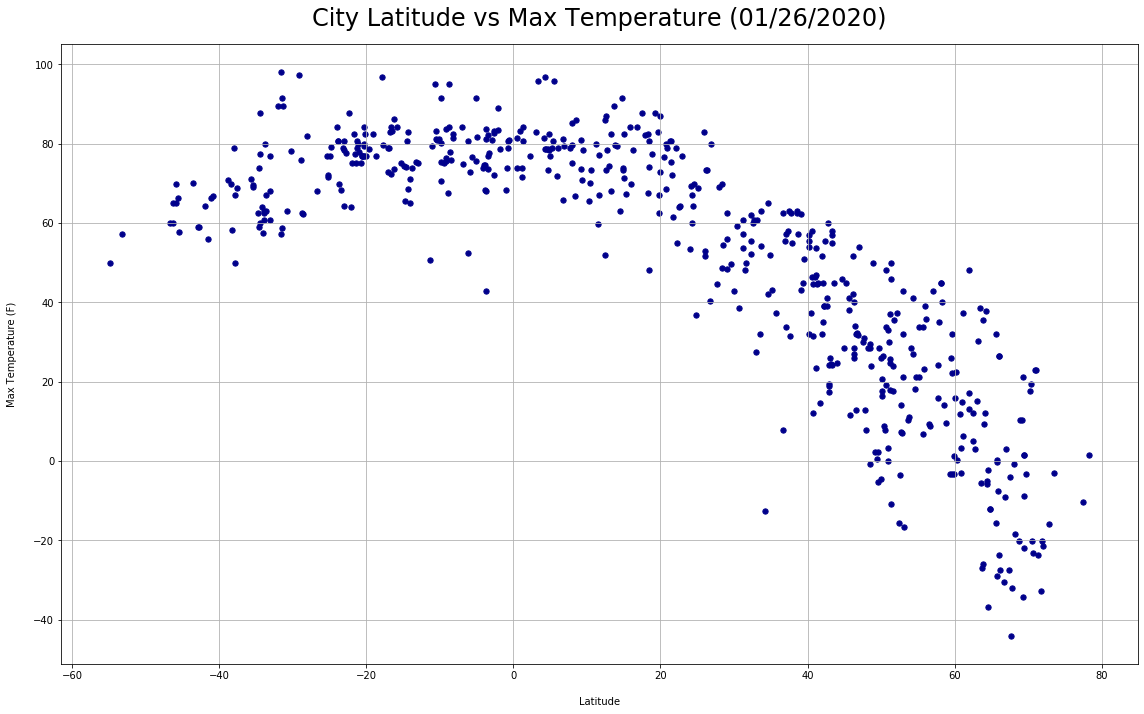

In [45]:
# Generate a scatter plot of Latitude vs. Temperature from the OpenWeather API data frame.
openweather_df.plot(figsize=(16,10), kind='scatter', x='Lat', y='Max Temp', marker="o", c='DarkBlue', s=28, grid='major')
plt.title('City Latitude vs Max Temperature (01/26/2020)', fontsize=24, y=1.02)
plt.xlabel('Latitude', labelpad=16)
plt.ylabel('Max Temperature (F)', labelpad=16)
plt.tight_layout()
plt.savefig('WeatherPy_Images/LATvTEMP.png')
plt.show()

In [ ]:
# The above plot uses a random sample of 546 global cities weather information obtained from OpenWeatherMap.org.
# It ties a city's observed maximum temperature in degrees Fahrenheit on January, 26 2020 to their latitude.

#### Latitude vs. Humidity Plot

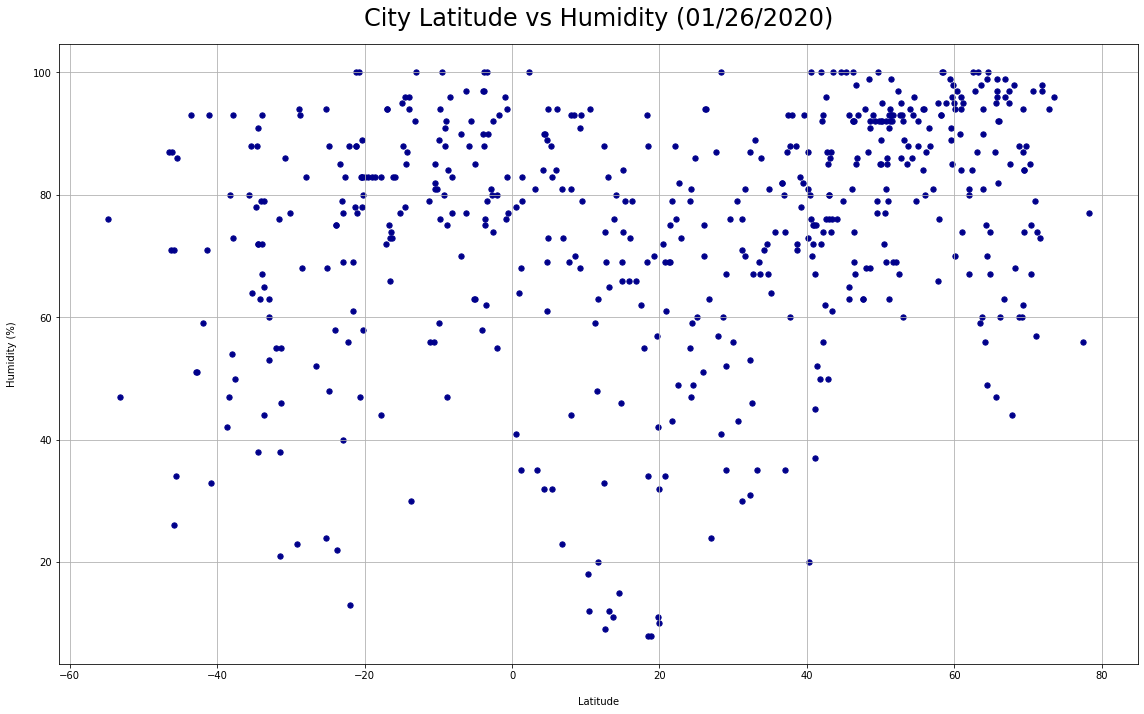

In [42]:
# Generate a scatter plot of Latitude vs. Humidity from the OpenWeather API data
openweather_df.plot(figsize=(16,10), kind='scatter', x='Lat', y='Humidity', marker="o", c='DarkBlue', s=28, grid='major')
plt.title('City Latitude vs Humidity (01/26/2020)', fontsize=24, y=1.02)
plt.xlabel('Latitude', labelpad=16)
plt.ylabel('Humidity (%)', labelpad=16)
plt.tight_layout()
plt.savefig('WeatherPy_Images/LATvHUMD.png')
plt.show()

In [ ]:
# The above plot uses a random sample of 546 global cities weather information obtained from OpenWeatherMap.org.
# It ties a city's observed humidity percentage value on January, 26 2020 to their latitude.

#### Latitude vs. Cloudiness Plot

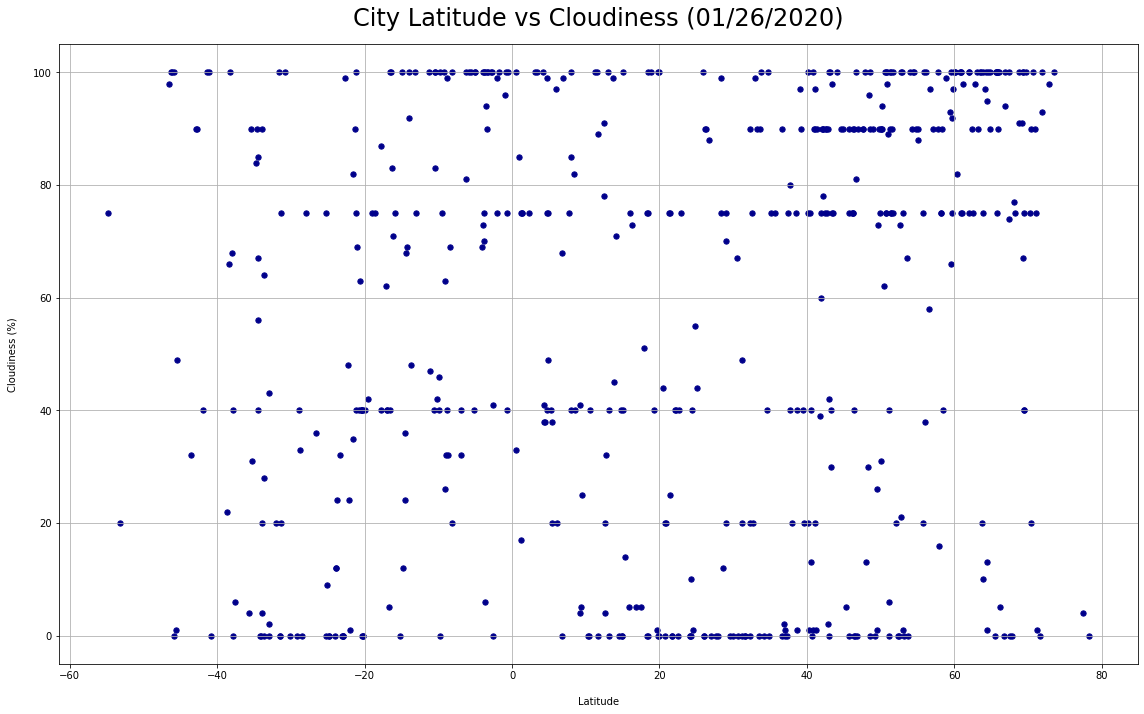

In [43]:
# Generate a scatter plot of Latitude vs. Cloudiness from the OpenWeather API data
openweather_df.plot(figsize=(16,10), kind='scatter', x='Lat', y='Cloudiness', marker="o", c='DarkBlue', s=28, grid='major')
plt.title('City Latitude vs Cloudiness (01/26/2020)', fontsize=24, y=1.02)
plt.xlabel('Latitude', labelpad=16)
plt.ylabel('Cloudiness (%)', labelpad=16)
plt.tight_layout()
plt.savefig('WeatherPy_Images/LATvCLOUD.png')
plt.show()

In [ ]:
# The above plot uses a random sample of 546 global cities weather information obtained from OpenWeatherMap.org.
# It ties a city's observed cloudiness percentage value on January, 26 2020 to their latitude.

#### Latitude vs. Wind Speed Plot

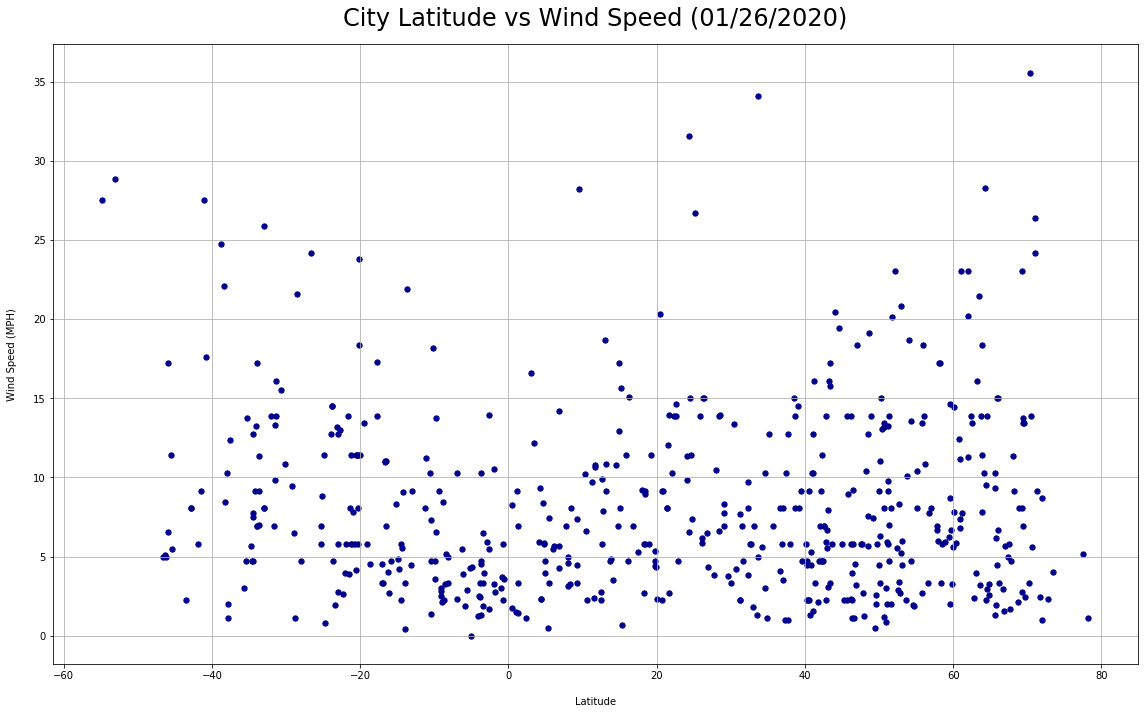

In [44]:
# Generate a scatter plot of Latitude vs. Wind Speed from the OpenWeather API data
openweather_df.plot(figsize=(16,10), kind='scatter', x='Lat', y='Wind Speed', marker="o", c='DarkBlue', s=28, grid='major')
plt.title('City Latitude vs Wind Speed (01/26/2020)', fontsize=24, y=1.02)
plt.xlabel('Latitude', labelpad=16)
plt.ylabel('Wind Speed (MPH)', labelpad=16)
plt.tight_layout()
plt.savefig('WeatherPy_Images/LATvWIND.png')
plt.show()

In [ ]:
# The above plot uses a random sample of 546 global cities weather information obtained from OpenWeatherMap.org.
# It ties a city's observed wind speed value in miles per hour on January, 26 2020 to their latitude.

## Linear Regression

In [112]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_reg(x,y):

    # Create equation of line to calculate predicted y-value
    plot_fit = slope * x + intercept

    plt.scatter(x,y, c='DarkBlue', s=28)
    plt.plot(x,plot_fit,'r:')
    plt.grid(b=True, which='major', axis='both', alpha=0.3)

In [113]:
# Create Northern and Southern Hemisphere DataFrames
north_weather_df = openweather_df.loc[openweather_df['Lat'] >=0]
south_weather_df = openweather_df.loc[openweather_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8737012424216672


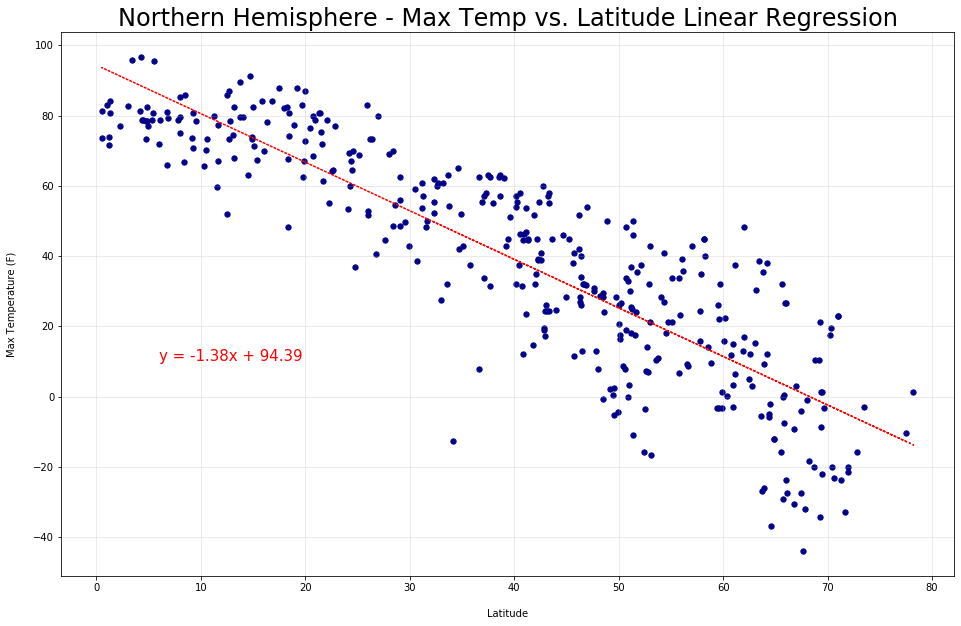

In [114]:
x = north_weather_df.loc[:,'Lat']
y = north_weather_df.loc[:,'Max Temp']

# Perform a linear regression on x and y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

fig, ax = plt.subplots(figsize=(16,10))

plot_reg(x,y)

ax.set_title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression', fontsize=24)
plt.annotate(line_eq,(6,10),fontsize=15,color="red",annotation_clip=False)
plt.xlabel('Latitude', labelpad=16)
plt.ylabel('Max Temperature (F)', labelpad=16)
print(f'The r-squared is: {rvalue}')
plt.savefig('WeatherPy_Images/NorthRegressionLATvTEMP.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4442099968437256


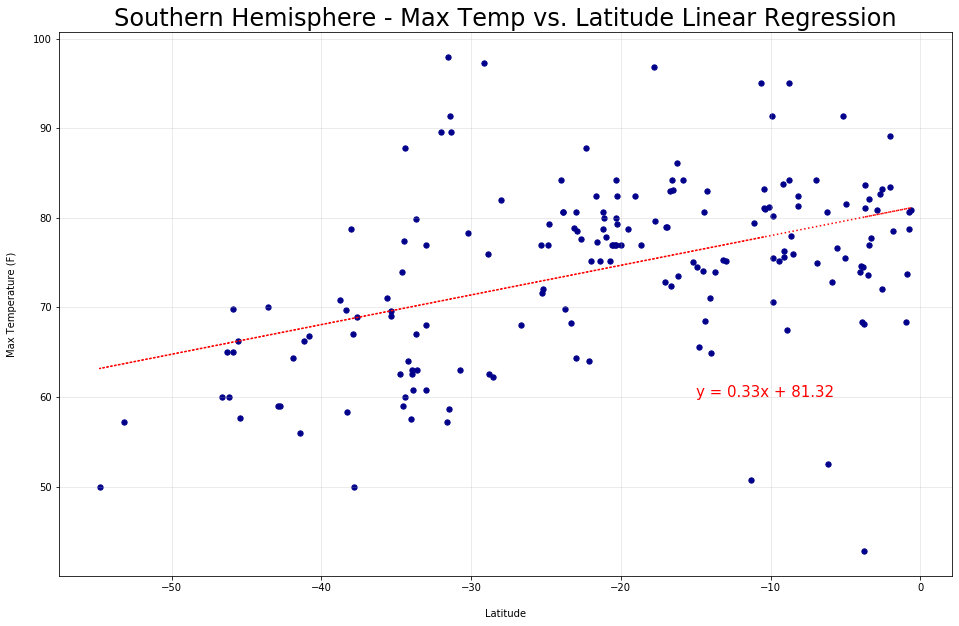

In [116]:
x = south_weather_df.loc[:,'Lat']
y = south_weather_df.loc[:,'Max Temp']

# Perform a linear regression on x and y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

fig, ax = plt.subplots(figsize=(16,10))

plot_reg(x,y)

ax.set_title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression', fontsize=24)
plt.annotate(line_eq,(-15,60),fontsize=15,color="red",annotation_clip=False)
plt.xlabel('Latitude', labelpad=16)
plt.ylabel('Max Temperature (F)', labelpad=16)
print(f'The r-squared is: {rvalue}')
plt.savefig('WeatherPy_Images/SouthRegressionLATvTEMP.png')
plt.show()

In [ ]:
# The 'Northern Hemisphere - Max Temp vs. Latitude Linear Regression' and 'Southern Hemisphere - Max Temp vs. Latitude 
# Linear Regression' plots are modeling maximum temperature values for cities in the each respective hemisphere on 
# January, 26 2020 by their latitude. This regression model fits the data well for the cities in the northern hemisphere as we 
# can observe that the maximum temperatures increase with a low variance rate as the cities' latitudes get nearer the equator.
# This regression model does not fit the data well for the southern hemisphere. We can observe that variance in the maximum 
# temperatures increases again as the cities' latitudes get nearer the equator, however there are significant outliers in 
# the model. This is particularly noticable near -30 degrees latitude where the model indicates that the temperature 
# should be near 72 degrees, but we observe temperature fluctuation from 60 to almost 100 degrees.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.40086567825942127


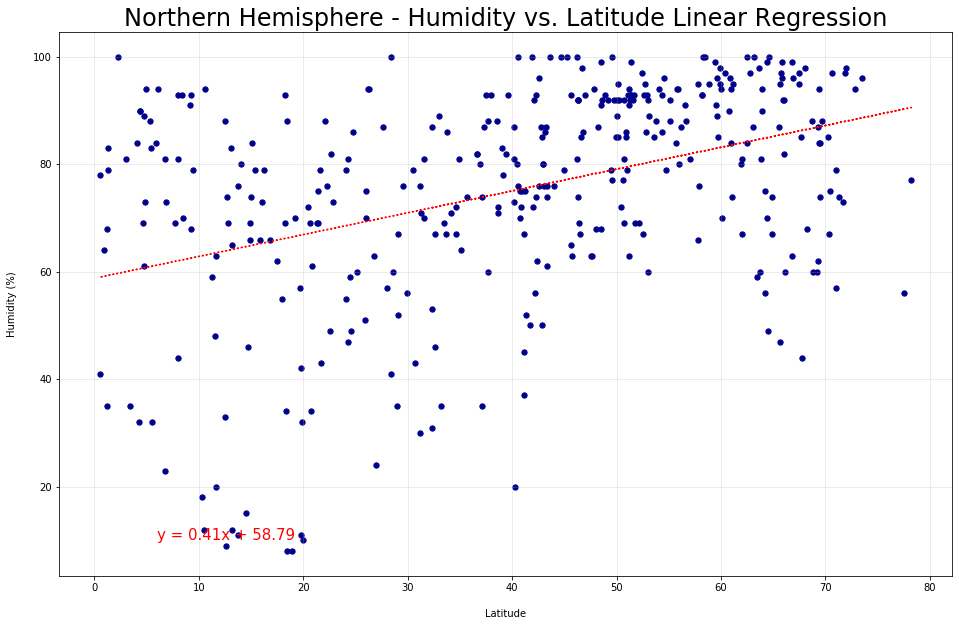

In [117]:
x = north_weather_df.loc[:,'Lat']
y = north_weather_df.loc[:,'Humidity']

# Perform a linear regression on x and y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

fig, ax = plt.subplots(figsize=(16,10))

plot_reg(x,y)

ax.set_title('Northern Hemisphere - Humidity vs. Latitude Linear Regression', fontsize=24)
plt.annotate(line_eq,(6,10),fontsize=15,color="red",annotation_clip=False)
plt.xlabel('Latitude', labelpad=16)
plt.ylabel('Humidity (%)', labelpad=16)
print(f'The r-squared is: {rvalue}')
plt.savefig('WeatherPy_Images/NorthRegressionLATvHUMID.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.35435068830915356


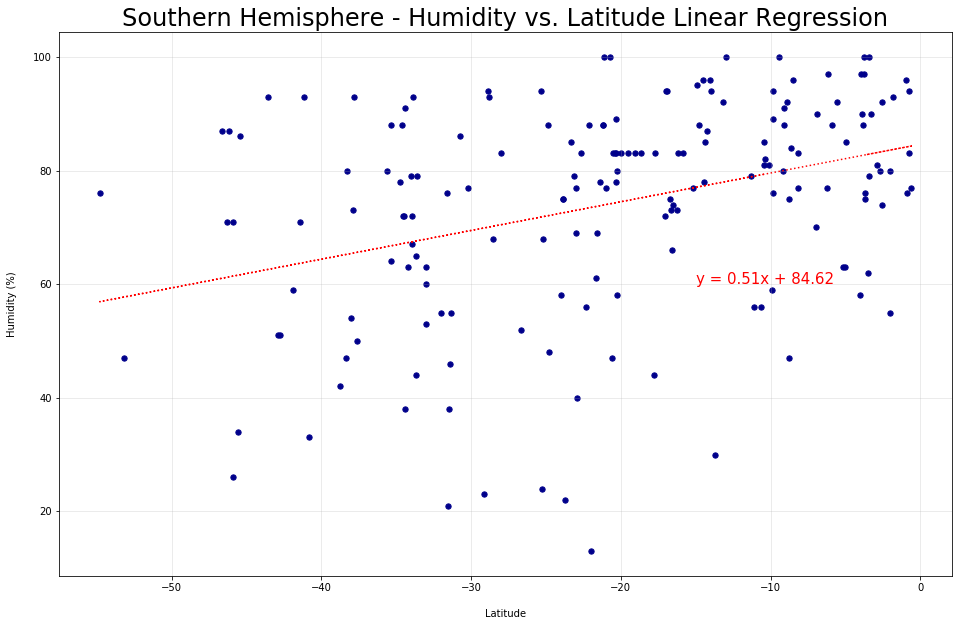

In [118]:
x = south_weather_df.loc[:,'Lat']
y = south_weather_df.loc[:,'Humidity']

# Perform a linear regression on x and y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

fig, ax = plt.subplots(figsize=(16,10))

plot_reg(x,y)

ax.set_title('Southern Hemisphere - Humidity vs. Latitude Linear Regression', fontsize=24)
plt.annotate(line_eq,(-15,60),fontsize=15,color="red",annotation_clip=False)
plt.xlabel('Latitude', labelpad=16)
plt.ylabel('Humidity (%)', labelpad=16)
print(f'The r-squared is: {rvalue}')
plt.savefig('WeatherPy_Images/SouthRegressionLATvHUMID.png')
plt.show()

In [ ]:
# The 'Northern Hemisphere - Humidity' and 'Southern Hemisphere - Humidity' plots are modeling humidity values for 
# cities in each hemisphere on January, 26 2020 by their latitude. This regression model does not fit the data 
# well for either hemisphere. We can observe large variances in the humidity values in both plots.
# As the cities' latitudes get nearer the equator, we can see a general clustering of higher humidity values, but there are
# a number of outlier values in the northern hemisphere below 20 degrees N latitude that are below 40% humidity that 
# indicate a lack of correlation between humidity and latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.25798190235219687


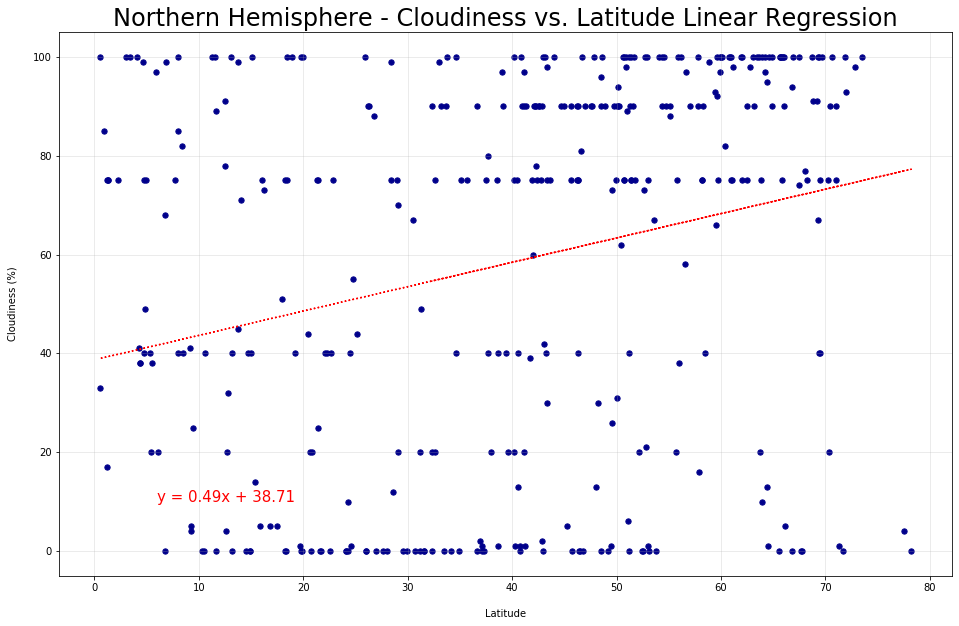

In [119]:
x = north_weather_df.loc[:,'Lat']
y = north_weather_df.loc[:,'Cloudiness']

# Perform a linear regression on x and y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

fig, ax = plt.subplots(figsize=(16,10))

plot_reg(x,y)

ax.set_title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression', fontsize=24)
plt.annotate(line_eq,(6,10),fontsize=15,color="red",annotation_clip=False)
plt.xlabel('Latitude', labelpad=16)
plt.ylabel('Cloudiness (%)', labelpad=16)
print(f'The r-squared is: {rvalue}')
plt.savefig('WeatherPy_Images/NorthRegressionLATvCLOUD.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.27218359078610893


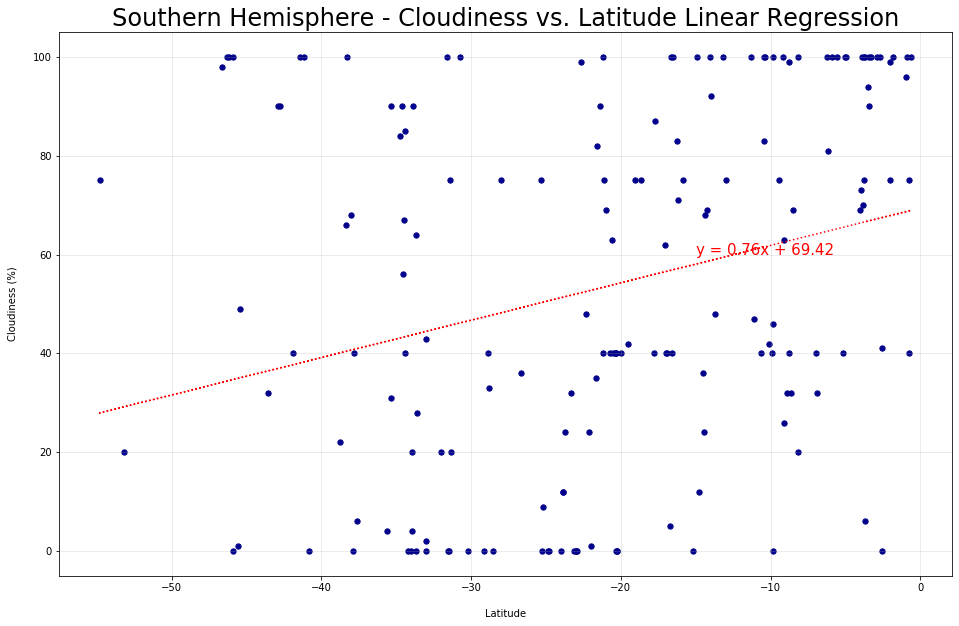

In [120]:
x = south_weather_df.loc[:,'Lat']
y = south_weather_df.loc[:,'Cloudiness']

# Perform a linear regression on x and y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

fig, ax = plt.subplots(figsize=(16,10))

plot_reg(x,y)

ax.set_title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression', fontsize=24)
plt.annotate(line_eq,(-15,60),fontsize=15,color="red",annotation_clip=False)
plt.xlabel('Latitude', labelpad=16)
plt.ylabel('Cloudiness (%)', labelpad=16)
print(f'The r-squared is: {rvalue}')
plt.savefig('WeatherPy_Images/SouthRegressionLATvCLOUD.png')
plt.show()

In [ ]:
# The attempt to model for Cloudiness (%) vs. Latitude for both the northern and southern hemispheres has yielded little
# correlation. It seems that there is little to indicate that north/south positioning on the planet has any bearing on the
# amount of cloud cover present at a given time.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08892630320408092


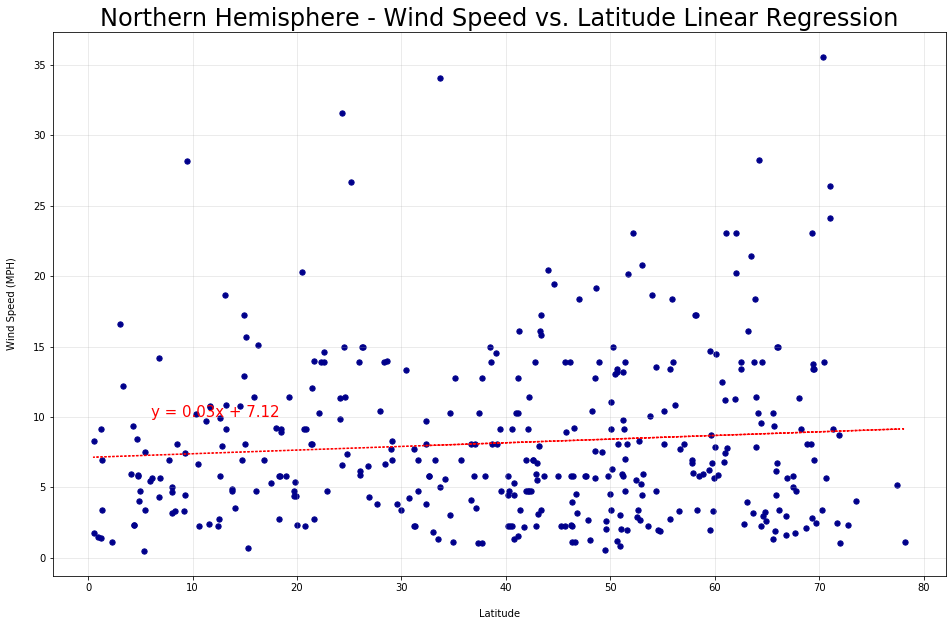

In [121]:
x = north_weather_df.loc[:,'Lat']
y = north_weather_df.loc[:,'Wind Speed']

# Perform a linear regression on x and y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

fig, ax = plt.subplots(figsize=(16,10))

plot_reg(x,y)

ax.set_title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression', fontsize=24)
plt.annotate(line_eq,(6,10),fontsize=15,color="red",annotation_clip=False)
plt.xlabel('Latitude', labelpad=16)
plt.ylabel('Wind Speed (MPH)', labelpad=16)
print(f'The r-squared is: {rvalue}')
plt.savefig('WeatherPy_Images/NorthRegressionLATvWIND.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.4206089446327108


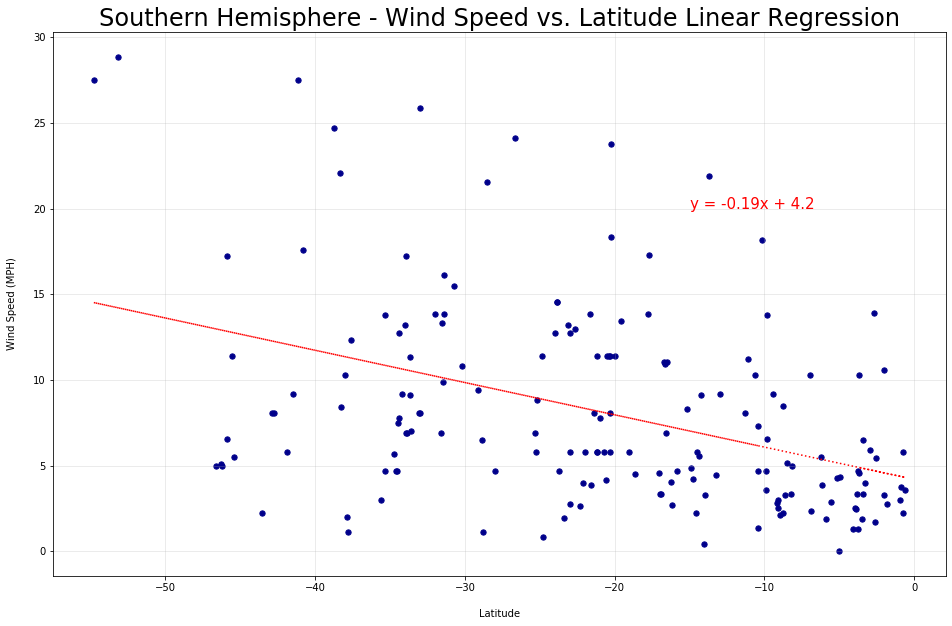

In [123]:
x = south_weather_df.loc[:,'Lat']
y = south_weather_df.loc[:,'Wind Speed']

# Perform a linear regression on x and y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

fig, ax = plt.subplots(figsize=(16,10))

plot_reg(x,y)

ax.set_title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression', fontsize=24)
plt.annotate(line_eq,(-15,20),fontsize=15,color="red",annotation_clip=False)
plt.xlabel('Latitude', labelpad=16)
plt.ylabel('Wind Speed (MPH)', labelpad=16)
print(f'The r-squared is: {rvalue}')
plt.savefig('WeatherPy_Images/SouthRegressionLATvWIND.png')
plt.show()

In [ ]:
# The model for Wind Speed (MPH) vs. Latitude for both the northern and southern hemispheres has also yielded little to no
# correlation. The plotted sample for the each hemisphere indicates that most locations experienced wind speeds below 15 MPH
# on January, 26 2020. This sample indicates that north/south location on the planet has minimal bearing on the
# amount of wind present at a given time.